# Particle Swarm Optimization (PSO)

* Algoritmo evolucionário
* Reproduzir comportamento de espécies

<img src = "images/birds.png" width = 800>

## The Cornfield Vector
* Simular geograficamente o comportamento das espécies
* Lembrança da melhor posição individual
* Lembrança da melhor posição global

<img src="images/cornfieldvector.png" width = 500>

In [40]:
import numpy as np

### Funções gerais

#### Minimizar x**2 + y**2

<img src="images/function.png" width=300>

In [41]:
class Utils:
    
    @staticmethod
    def function(position):
        '''
        Calcula a distância euclidiana
        '''
        position = np.array(position)
        result = sum(position**2)
            
        return result

### Classe de partículas

<img src = "images/particle.png" width = 400>

In [42]:
class Particle:
    def __init__(self, num_dimensions, bounds):
        '''
        Construtor
        '''
        self.num_dimensions = num_dimensions
        self.bounds = bounds
        self.position = []
        self.velocity = []
        
        self.pbest = []
        self.pbest_score = np.inf
        self.score = np.inf
        
        # Para cada dimensão definir valores aleatórios entre os limites
        for i in range(self.num_dimensions):
            lower_bound = self.bounds[i][0]
            upper_bound = self.bounds[i][1]
            self.position.append(np.random.uniform(lower_bound, upper_bound))
            self.velocity.append(np.random.uniform(lower_bound, upper_bound))
            
    def __repr__(self):
        return f"\nPosition {self.position}\nVelocity {self.velocity}"
            
    def evaluate(self):
        '''
        Avaliação da função e atualização do pbest
        '''
        self.score = Utils.function(self.position)
        if self.score < self.pbest_score:
            self.pbest = self.position
            self.pbest_score = self.score
            
    def calculate_velocity(self, best):
        '''
        Gerando nova velocidade baseado na melhor posição (local ou global)
        Todas as operações são feitas simultaneamente para todas as dimensões
        Args:
            - best: posição do melhor (pbest ou gbest)
        '''
        # Calculando diferença entre a posição atual e a melhor
        delta = np.array(best) - np.array(self.position)
        
        # Sorteando magnitude aleatória
        magnitude = np.random.uniform(0, 0.5, size = self.num_dimensions)
        magnitude = np.round(magnitude, 2)
        
        # Multiplicando a magnitude pelo delta
        return delta*magnitude
    
    
        
    def update_velocity(self, gbest_pos, velocity_rate):
        '''
        Atualizar a nova velocidade
        Calcula a velocidade cognitiva (pbest) e a velocidade social (gbest) e atualiza a própria velocidade
        baseado em uma taxa para cada velocidade
        '''
        cognitive_velocity = self.calculate_velocity(self.pbest)
        social_velocity = self.calculate_velocity(gbest_pos)
        
        self.velocity = (np.array(self.velocity) * velocity_rate[0]
                        + cognitive_velocity * velocity_rate[1] 
                        + social_velocity * velocity_rate[2])
        
    def update_position(self):
        '''
        Atualizando a posição e verificando os limites
        '''
        self.position = list(np.array(self.position) + np.array(self.velocity))
                

### Classe do enxame

In [43]:
class Swarm:

    def __init__(self, particles):
        '''
        Construtor
        '''
        self.particles = particles
        self.gbest = []
        self.gbest_score = np.inf
        
        
    def swarm_evaluate(self):
        '''
        Percorre todas as partículas para avaliá-las
        '''
        for p in self.particles:
            p.evaluate()
            
    def swarm_update_velocities(self, VELOCITY_RATE):
        '''
        Percorre todas as partículas e chama a função para atualizar a velocidade
        '''
        for p in self.particles:
            p.update_velocity(self.gbest, VELOCITY_RATE)

    def swarm_update_positions(self):
        '''
        Percorre todas as partículas e chama a função para atualizar a posição
        '''
        for p in self.particles:
            p.update_position()
            
    def swarm_update_gbest(self):
        '''
        Atualiza o gbest baseado no pbest de cada indivíduo
        '''
        for p in self.particles:
            if p.pbest_score < self.gbest_score:
                self.gbest_score = p.pbest_score
                self.gbest = p.pbest
                
    def swarm_mean_score(self):
        '''
        Calcula a pontuação média do enxame
        '''
        # Lendo a pontuação de cada partícula e colocando em uma lista
        scores = [p.score for p in self.particles]
        return (sum(scores) / len(scores))

### Principal

In [44]:
from plot_utils2 import PlotUtils

NUM_ITERATIONS = 30
NUM_PARTICLES = 100
NUM_DIMENSIONS = 2
BOUNDS = [(-10, 10), (-10, 10)]
VELOCITY_RATE = [0.5, 0.25, 0.25]

if __name__ == "__main__":
    PlotUtils.start_plot()
    gbest_historic = []
    score_historic = []

    particles = []
    for i in range(NUM_PARTICLES):
        particles.append(Particle(NUM_DIMENSIONS, BOUNDS))

    swarm = Swarm(particles)

    print("Starting iterations")
    i = 0
    while i < NUM_ITERATIONS:
        print(f"Iteration {i}")
       
        swarm.swarm_evaluate()
        swarm.swarm_update_gbest()
        swarm.swarm_update_velocities(VELOCITY_RATE)
        swarm.swarm_update_positions()
        
        gbest_historic.append(swarm.gbest_score)
        score_historic.append(swarm.swarm_mean_score())

        for p in swarm.particles:
            PlotUtils.plot_particle(p)
        PlotUtils.plot_iteration(i)
        
        i += 1

    PlotUtils.save()

Starting iterations
Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29


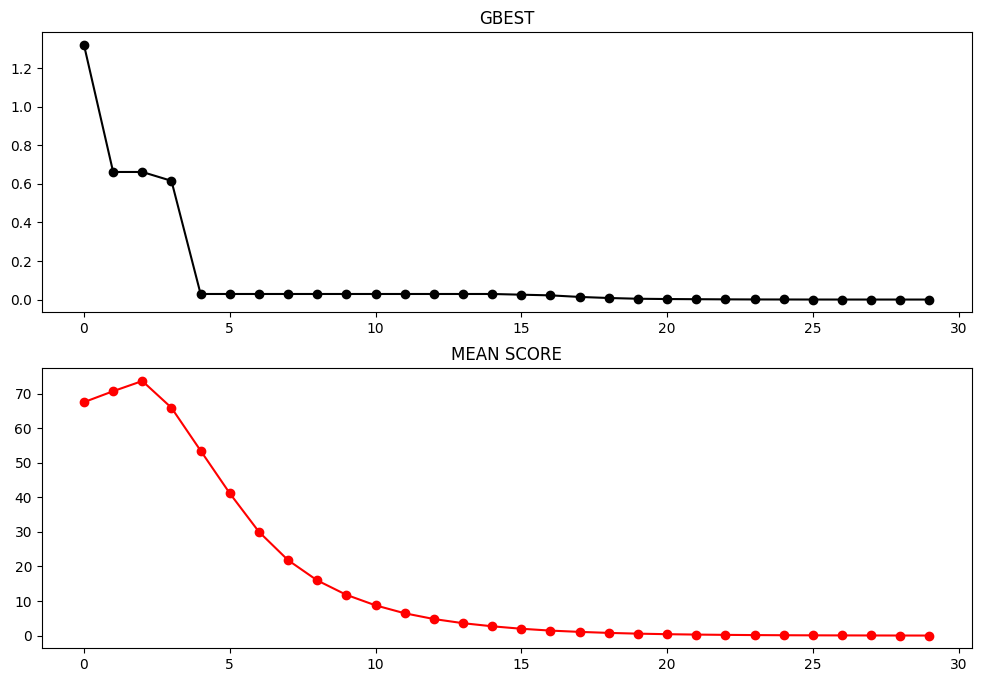

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,8))

plt.subplot(2, 1, 1)
plt.title("GBEST")
plt.plot(gbest_historic, marker = 'o', color = 'black')

plt.subplot(2, 1, 2)
plt.title("MEAN SCORE")
plt.plot(score_historic, marker = 'o', color = 'red')

plt.show()

In [46]:
print(f"Melhor posição: {swarm.gbest}")
print(f"Melhor pontuação: {swarm.gbest_score}")

Melhor posição: [-0.0021132121612398263, -0.005055553472801702]
Melhor pontuação: 3.002428655476925e-05
